In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'details', 'categories', 'url'])

In [2]:
X,y = mnist['data'], mnist['target']
print(X.shape, y.shape)

(70000, 784) (70000,)


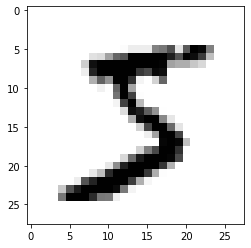

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
some_number = X[0]
some_digit_image = some_number.reshape(28,28)

plt.imshow(some_digit_image, cmap = 'binary')
plt.show()

In [4]:
import numpy as np
y = y.astype(np.uint8) #to change the y integer from string

In [5]:
X_train, y_train, X_test, y_test = X[:60000], y[:60000], X[60000:], y[60000:]
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 784) (60000,) (10000, 784) (10000,)


In [6]:
# making the problem easy by making it binary calsification problem
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [7]:
from sklearn.linear_model import SGDClassifier
scg_cal = SGDClassifier(random_state = 42)
scg_cal.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [8]:
scg_cal.predict([X[0]])

array([ True])

In [9]:
y[0]

5

In [10]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfold = StratifiedKFold(n_splits=3, random_state=42)
for train_index, test_index in skfold.split(X_train, y_train_5):
    clone_clf = clone(scg_cal)
    X_train_fold = X_train[train_index]
    y_train_fold = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]
    clone_clf.fit(X_train_fold, y_train_fold)
    y_pred = clone_clf.predict(X_test_fold)
    n_correctes = sum(y_pred == y_test_fold)
    per_accuracy = n_correctes/len(y_test_fold)
    print(per_accuracy)


0.95035
0.96035
0.9604


In [11]:
from sklearn.model_selection import cross_val_score
cross_val_score(scg_cal, X_train, y_train_5, cv= 3)

array([0.95035, 0.96035, 0.9604 ])

In [12]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def __init__(self):
        pass
    def fit(self,X,y=None):
        pass
    def predict(self,X):
        return np.zeros((len(X),1), dtype = bool)
        
    

In [13]:
never_5_cal = Never5Classifier()
cross_val_score(never_5_cal,X_train,y_train_5, cv = 3, scoring = 'accuracy')

array([0.91125, 0.90855, 0.90915])

In [14]:
from sklearn.model_selection import cross_val_predict

y_predict = cross_val_predict(scg_cal, X_train, y_train_5, cv=3)

In [15]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_predict)

array([[53892,   687],
       [ 1891,  3530]])

In [16]:
from sklearn.metrics import precision_score, recall_score

print('precison score: ',precision_score(y_train_5, y_predict))
print('recall score: ', recall_score(y_train_5, y_predict))

precison score:  0.8370879772350012
recall score:  0.6511713705958311


In [17]:
from sklearn.metrics import f1_score

print('f1_score', f1_score(y_train_5, y_predict))

f1_score 0.7325171197343846


In [18]:
y_score = cross_val_predict(scg_cal, X_train, y_train_5, cv=3, method = 'decision_function')

In [19]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresolds  = precision_recall_curve(y_train_5, y_score)


In [20]:
def plot_precision_recall_curve(precisions,recalls,thresolds):
    plt.plot(thresolds, precisions[:-1], 'b--', label = 'Presion')
    plt.plot(thresolds, recalls[:-1], 'g-', label = 'Recall')
    
    

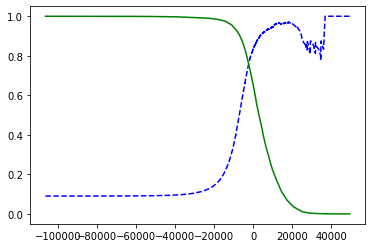

In [21]:
plot_precision_recall_curve(precisions,recalls,thresolds)
plt.show()

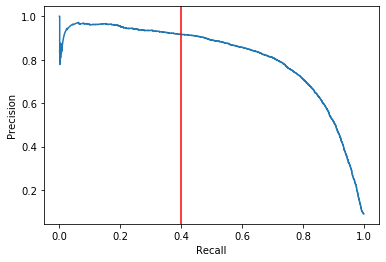

In [22]:
plt.plot(recalls,precisions)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.axvline(x=0.4, c='red')
plt.show()

In [23]:
thesold_90_precision = thresolds[np.argmax(precisions>= 0.9)]
thesold_90_precision

3370.0194991439557

In [24]:
y_pred_90 = (y_score >= thesold_90_precision)

In [25]:
print('precison score: ',precision_score(y_train_5, y_pred_90))
print('recall score: ', recall_score(y_train_5, y_pred_90))

precison score:  0.9000345901072293
recall score:  0.4799852425751706


In [26]:
from sklearn.metrics import roc_curve

fpr, tpr , thresolds = roc_curve(y_train_5, y_score)

In [27]:
def plot_roc_curve(fpr, tpr, thresolds, label=None):
    plt.plot(fpr,tpr, linewidth=2, label = label)
    plt.plot([0,1], [0,1], 'k--')
    plt.grid()
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')

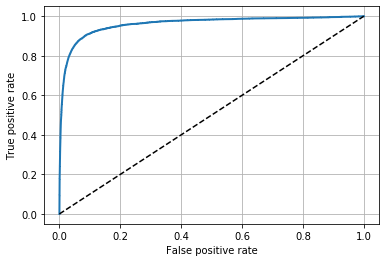

In [28]:
plot_roc_curve(fpr, tpr, thresolds)
plt.show()


In [29]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_score)

0.9604938554008616

In [30]:
from sklearn.ensemble import RandomForestClassifier

ran_for_cal = RandomForestClassifier(random_state = 42)
ran_for_cal.fit(X_train, y_train_5)
y_predect_forest = cross_val_predict(ran_for_cal,X_train, y_train_5, cv=3, method = 'predict_proba')


/Users/deepankar/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [31]:
y_score_forest = y_predect_forest[:,1]
y_score_forest

array([0.9, 0. , 0.1, ..., 1. , 0. , 0. ])

In [32]:
fpr_forest, tpr_forest, thesolds_forest = roc_curve(y_train_5, y_score_forest)

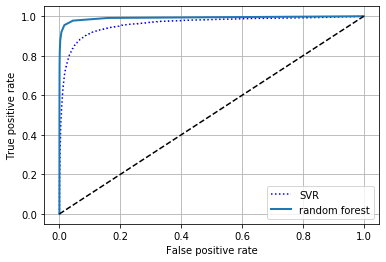

In [33]:
plt.plot(fpr,tpr,'b:', label = 'SVR')
plot_roc_curve(fpr_forest, tpr_forest, thresolds, 'random forest')
plt.legend(loc="lower right")
plt.show()



In [34]:
roc_auc_score(y_train_5, y_score_forest)

0.9920527492698306

In [35]:
y_predict_forest = cross_val_predict(ran_for_cal, X_train, y_train_5, cv=3)
print('precison score: ',precision_score(y_train_5, y_predict_forest))
print('recall score: ', recall_score(y_train_5, y_predict_forest))

precison score:  0.986046511627907
recall score:  0.8212506917542889


In [36]:
f1_score(y_train_5, y_predict_forest)

0.8961352657004831